# Tarea 4.
### Triana, Emiliano y Rodolfo
Resolver el problema de clasificación de dos anillos concéntricos utilizando el algoritmo de kernel perceptron. El  algoritmo se deberán codificar usando numpy.   Se deberá implementar y contrastar el desempeño de un kernel polinómico cuadrático y uno gaussiano (rbf).

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
import scipy

import matplotlib.pyplot as plt
%matplotlib notebook

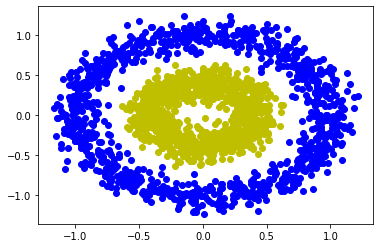

In [2]:
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
#plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(X[y==0,0], X[y==0,1], "bo")
plt.plot(X[y==1,0], X[y==1,1], "yo")

In [3]:
def plot_contour(X1_train, X2_train, Xo, y,alpha, kernel):
    
    plt.plot(X1_train[:,0], X1_train[:,1], "bo")
    plt.plot(X2_train[:,0], X2_train[:,1], "yo")

    X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z=np.zeros(len(X))
 
    for i in range(0,len(X)):
        Z[i] = np.sum(alpha*y*kernel(Xo,X[i,:]))
    Z=Z.reshape(X1.shape)
    
    plt.contour(X1, X2, Z, [0.0], colors='r', linewidths=3, origin='lower')
    
    plt.show()

In [4]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1

Kernel Perceptron

In [5]:
def kernel_perceptron(X, y, kernel):
    n = len(X)
    alpha = np.zeros(n)
    
    for i in range(n):
        if y[i] * np.sum(alpha * y * kernel(X, X[i])) <= 0:
            alpha[i] += 1
            
    return alpha

In [6]:
def predict(X, y, alpha, kernel):
    y_estimador=np.zeros(len(X))
    
    for i in range(len(X)):
        if np.sum(alpha*y*kernel(X,X[i,:])) <= 0:
            y_estimador[i] = -1
        else:
             y_estimador[i] = 1
                
    return y_estimador

In [7]:
def accuracy(y_estimador, y_test): 
    n = 0
    for i in range(len(y_test)): 
        if y_estimador[i] == y_test[i]: 
            n += 1
            
    return n/len(y_test)

Polinómico Cuadrático

In [8]:
def kernel_cuad(X,y):
    return (1 + np.dot(X,y)) ** 2

In [9]:
alpha = kernel_perceptron(X, y, kernel_cuad)
y_estimador = predict(X, y, alpha, kernel_cuad)
accuracy(y_estimador, y)

0.995

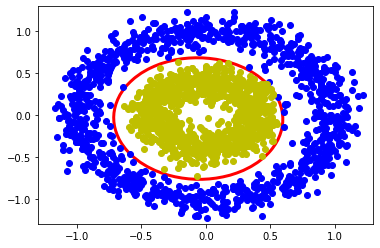

In [10]:
plot_contour(X[y_estimador==-1], X[y_estimador==1], X, y, alpha, kernel_cuad)

Gaussiano

In [11]:
def kernel_gauss(X, y, gamma = 0.5):
    return np.exp(-gamma * np.sum((X - y) ** 2, axis = 1))

In [12]:
alpha = kernel_perceptron(X, y, kernel_gauss)
y_estimador = predict(X, y, alpha, kernel_gauss)
accuracy(y_estimador, y)

0.9925

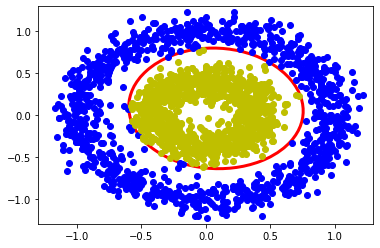

In [13]:
plot_contour(X[y_estimador==-1], X[y_estimador==1], X, y, alpha, kernel_gauss)

##Conclusiones
Es bastante similar su desempeño, sin embargo el polinómico cuadrático es ligeramente superior